In [7]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 1. Generar base de datos simulada
random.seed(42)

# Listas para generar datos
genders = ['M', 'F']
countries = ['USA', 'UK', 'India', 'Germany', 'Brazil']
books = ['Python Basics', 'Data Science Handbook', 'Machine Learning Guide', 'Deep Learning with Python', 'NLP Essentials']
professions = ['Engineer', 'Data Scientist', 'Researcher', 'Developer', 'Analyst']
payment_methods = ['Credit Card', 'Debit Card', 'PayPal', 'Bitcoin']
names = ['John', 'Mary', 'Carlos', 'Aisha', 'Yu', 'Daniel', 'Emma', 'Liam', 'Olivia', 'Sophia']

# Generar dataset
data = {
    'ID': [i for i in range(1, 101)],
    'Name': [random.choice(names) for _ in range(100)],
    'Gender': [random.choice(genders) for _ in range(100)],
    'Country': [random.choice(countries) for _ in range(100)],
    'Book': [random.choice(books) for _ in range(100)],
    'Profession': [random.choice(professions) for _ in range(100)],
    'Payment_Method': [random.choice(payment_methods) for _ in range(100)]
}

df = pd.DataFrame(data)

In [9]:
df

,ID,Name,Gender,Country,Book,Profession,Payment_Method
0,1,Mary,M,Germany,Machine Learning Guide,Analyst,Debit Card
1,2,John,F,India,Python Basics,Developer,Bitcoin
2,3,Yu,F,USA,Data Science Handbook,Analyst,Credit Card
3,4,Aisha,F,UK,Machine Learning Guide,Researcher,Debit Card
4,5,Aisha,F,UK,Machine Learning Guide,Engineer,Credit Card
...,...,...,...,...,...,...,...
95,96,Emma,F,Brazil,Machine Learning Guide,Data Scientist,Debit Card
96,97,Liam,F,UK,Machine Learning Guide,Engineer,Debit Card
97,98,Carlos,M,Brazil,Python Basics,Engineer,Credit Card
98,99,Yu,M,India,Machine Learning Guide,Developer,Debit Card


In [10]:
# 2. Análisis exploratorio
print(df.head())
print(df['Book'].value_counts())

# Codificar variables categóricas
encoded_df = pd.get_dummies(df.drop(['ID', 'Name'], axis=1))

# Separar en variables independientes y dependiente
X = encoded_df.drop('Book_Python Basics', axis=1, errors='ignore')
y = (df['Book'] == 'Python Basics').astype(int)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   ID   Name Gender  Country                    Book  Profession  \
0   1   Mary      M  Germany  Machine Learning Guide     Analyst   
1   2   John      F    India           Python Basics   Developer   
2   3     Yu      F      USA   Data Science Handbook     Analyst   
3   4  Aisha      F       UK  Machine Learning Guide  Researcher   
4   5  Aisha      F       UK  Machine Learning Guide    Engineer   

  Payment_Method  
0     Debit Card  
1        Bitcoin  
2    Credit Card  
3     Debit Card  
4    Credit Card  
Book
Machine Learning Guide       27
Data Science Handbook        25
Python Basics                21
NLP Essentials               14
Deep Learning with Python    13
Name: count, dtype: int64


In [11]:
# 3. Modelos para análisis de relaciones espurias

# Modelo 1: Regresión Logística
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.25      0.40         4

    accuracy                           0.85        20
   macro avg       0.92      0.62      0.66        20
weighted avg       0.87      0.85      0.81        20



In [12]:
# Importancia de variables en regresión logística
logreg_importance = pd.DataFrame({'Variable': X.columns, 'Importance': logreg.coef_[0]}).sort_values(by='Importance', ascending=False)
print(logreg_importance)

                          Variable  Importance
16          Payment_Method_Bitcoin    0.570242
14             Profession_Engineer    0.553985
6                      Country_USA    0.414983
2                   Country_Brazil    0.364070
19           Payment_Method_PayPal    0.175734
17      Payment_Method_Credit Card    0.171331
15           Profession_Researcher    0.125718
4                    Country_India    0.090732
1                         Gender_M    0.051722
13            Profession_Developer    0.018892
0                         Gender_F   -0.047821
11              Profession_Analyst   -0.196268
3                  Country_Germany   -0.204624
12       Profession_Data Scientist   -0.498427
5                       Country_UK   -0.661261
18       Payment_Method_Debit Card   -0.913407
8   Book_Deep Learning with Python   -1.435645
10             Book_NLP Essentials   -1.471658
9      Book_Machine Learning Guide   -1.851773
7       Book_Data Science Handbook   -2.183231


<ipython-input-13-d2207918a17a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variable', data=logreg_importance, palette='magma')


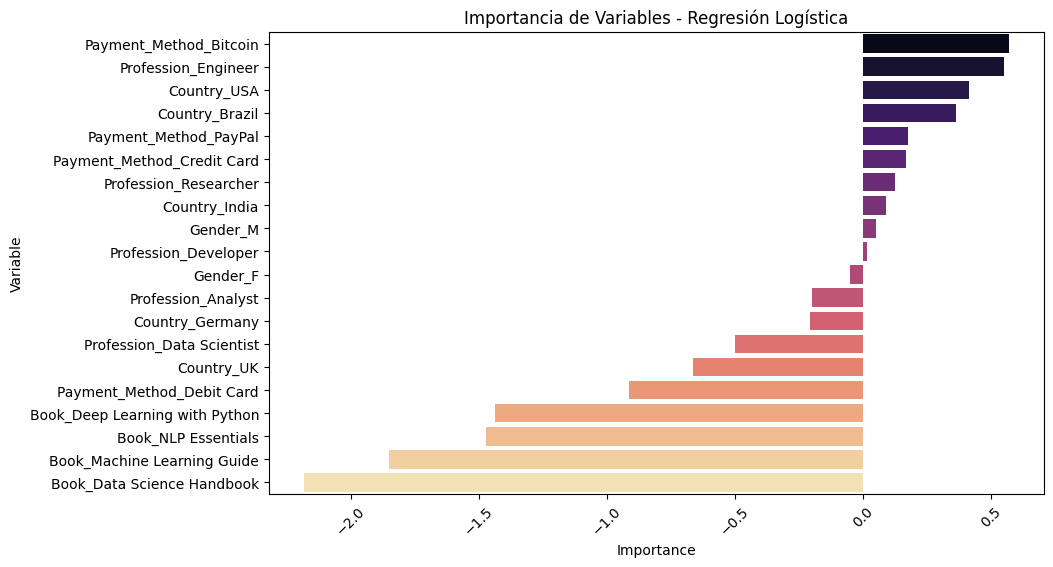

In [13]:
# Visualización del modelo de Regresión Logística
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Variable', data=logreg_importance, palette='magma')
plt.title('Importancia de Variables - Regresión Logística')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Modelo 2: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.25      0.40         4

    accuracy                           0.85        20
   macro avg       0.92      0.62      0.66        20
weighted avg       0.87      0.85      0.81        20



In [15]:
# Importancia de variables en Random Forest
rf_importance = pd.DataFrame({'Variable': X.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
print(rf_importance)

                          Variable  Importance
9      Book_Machine Learning Guide    0.127348
7       Book_Data Science Handbook    0.124387
10             Book_NLP Essentials    0.076157
8   Book_Deep Learning with Python    0.074596
5                       Country_UK    0.060345
18       Payment_Method_Debit Card    0.058988
16          Payment_Method_Bitcoin    0.052989
14             Profession_Engineer    0.047775
6                      Country_USA    0.037048
2                   Country_Brazil    0.036402
12       Profession_Data Scientist    0.035467
3                  Country_Germany    0.034658
17      Payment_Method_Credit Card    0.034543
11              Profession_Analyst    0.033484
15           Profession_Researcher    0.031244
0                         Gender_F    0.029620
19           Payment_Method_PayPal    0.028920
13            Profession_Developer    0.028794
1                         Gender_M    0.028489
4                    Country_India    0.018746


<ipython-input-16-5e815b7ac6b6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variable', data=rf_importance, palette='viridis')


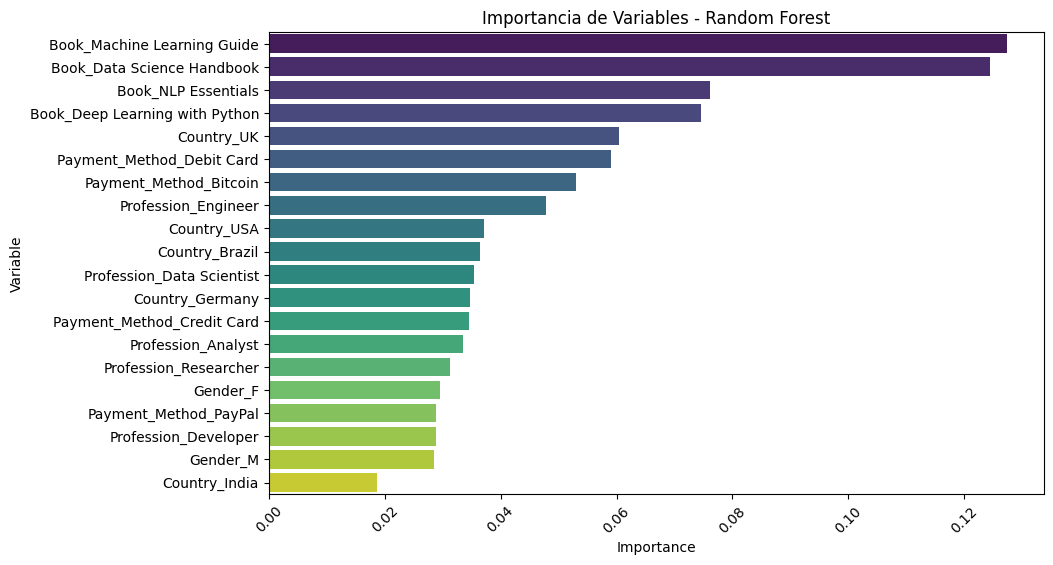

In [16]:
# Visualización del modelo Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Variable', data=rf_importance, palette='viridis')
plt.title('Importancia de Variables - Random Forest')
plt.xticks(rotation=45)
plt.show()


In [17]:
# Modelo 3: Red Neuronal
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("\nMLP Neural Network Results:")
print(classification_report(y_test, y_pred_mlp))


MLP Neural Network Results:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.50      0.67         4

    accuracy                           0.90        20
   macro avg       0.94      0.75      0.80        20
weighted avg       0.91      0.90      0.89        20



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


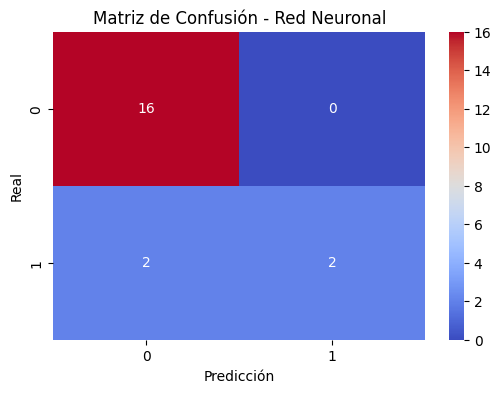

In [18]:
# Visualización de la matriz de confusión de la red neuronal
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Matriz de Confusión - Red Neuronal')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

<ipython-input-19-aeedbb99eddd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='plasma')


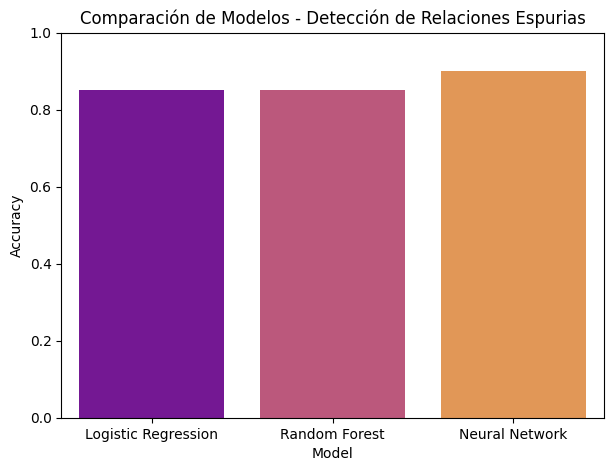

In [19]:
# 4. Comparación de modelos
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network'],
    'Accuracy': [accuracy_score(y_test, y_pred_logreg),
                 accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_mlp)]
})

plt.figure(figsize=(7, 5))
sns.barplot(x='Model', y='Accuracy', data=results, palette='plasma')
plt.title('Comparación de Modelos - Detección de Relaciones Espurias')
plt.ylim(0, 1)
plt.show()


In [20]:
# Conclusión: Revisar la importancia de las variables para identificar relaciones espurias
print("\nImportancia de variables según Regresión Logística")
print(logreg_importance)
print("\nImportancia de variables según Random Forest")
print(rf_importance)


Importancia de variables según Regresión Logística
                          Variable  Importance
16          Payment_Method_Bitcoin    0.570242
14             Profession_Engineer    0.553985
6                      Country_USA    0.414983
2                   Country_Brazil    0.364070
19           Payment_Method_PayPal    0.175734
17      Payment_Method_Credit Card    0.171331
15           Profession_Researcher    0.125718
4                    Country_India    0.090732
1                         Gender_M    0.051722
13            Profession_Developer    0.018892
0                         Gender_F   -0.047821
11              Profession_Analyst   -0.196268
3                  Country_Germany   -0.204624
12       Profession_Data Scientist   -0.498427
5                       Country_UK   -0.661261
18       Payment_Method_Debit Card   -0.913407
8   Book_Deep Learning with Python   -1.435645
10             Book_NLP Essentials   -1.471658
9      Book_Machine Learning Guide   -1.851773
7       